In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

kc_house_data.csv



In [2]:
df = pd.read_csv("../input/kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [3]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.base import clone
from itertools import combinations


In [6]:
df["date"] = pd.to_datetime(df["date"])
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [7]:
X_visual = df.iloc[:, 2:]
X = df.iloc[:, 3:]
y = df.iloc[:, 2]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
sns.set(style="whitegrid", context="notebook")
#sns.pairplot(X_visual, size=2.5)

In [10]:
cols = list(X_visual.columns)

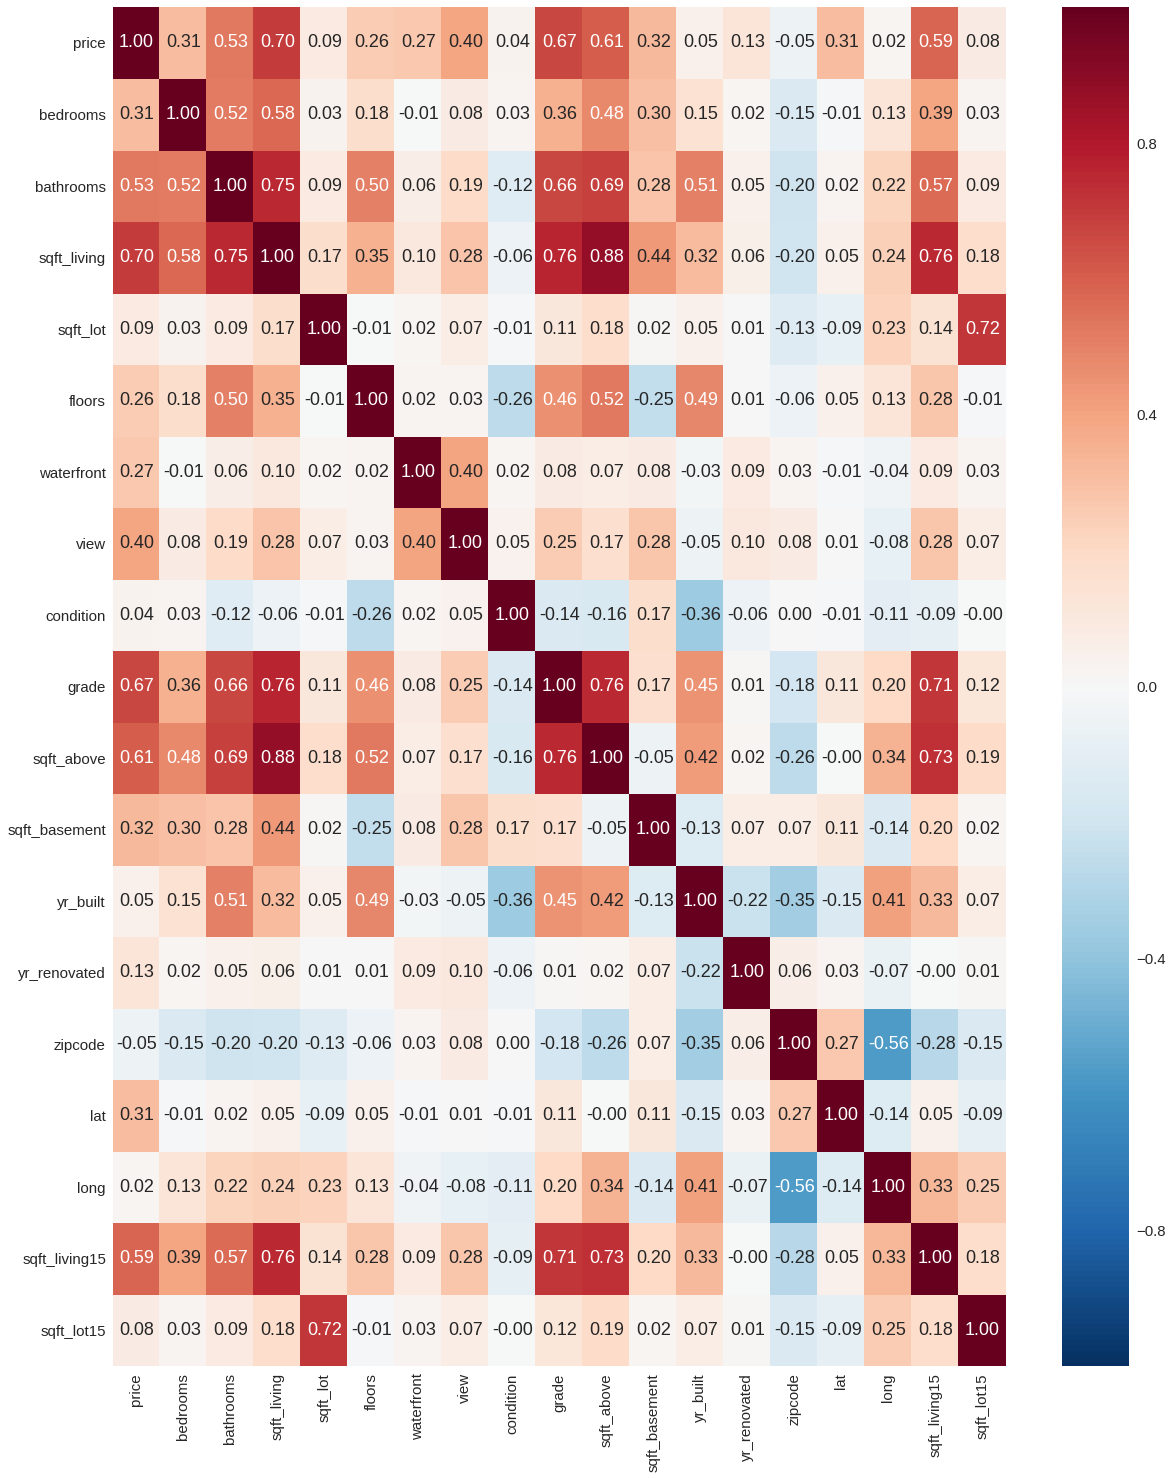

In [11]:
cm = np.corrcoef(X_visual.values.T)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize = (20,25))
hm = sns.heatmap(cm, cbar=True, annot=True, fmt = '.2f', xticklabels = cols, yticklabels = cols)

In [12]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [13]:
lr=LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_train)
pred1 = lr.predict(X_test)
print("r2_score for training data: ", r2_score(y_train, pred))
print("r2_score for test data: ", r2_score(y_test, pred1))

r2_score for training data:  0.699515584644
r2_score for test data:  0.699462705797


In [14]:
train_sizes, train_scores, test_scores =learning_curve(estimator=lr,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=-1)
#print(train_scores,test_scores)
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


[ 0.72260383  0.71333893  0.69808363  0.69426094  0.69453359  0.69942362
  0.70079411  0.70254649  0.70107245  0.70046476]


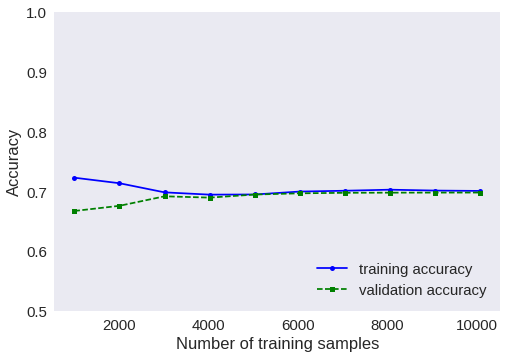

In [15]:
plt.plot(train_sizes, train_mean,
color='blue', marker='o',
markersize=5,
label='training accuracy')

plt.plot(train_sizes, test_mean,
color='green', linestyle='--',
marker='s', markersize=5,
label='validation accuracy')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

In [16]:
lr.coef_

array([ -32038.4549712 ,   30879.9319924 ,   82890.72488438,
          3911.75686088,    2862.84132154,   45577.06758803,
         41864.25566919,   15074.52116974,  111376.78757243,
         77186.57689502,   26696.151391  ,  -76180.09684416,
          8706.51196264,  -29679.36861698,   82473.12236036,
        -27549.74187729,   11080.64906506,   -9023.43362975])

In [17]:
ridge = Ridge()
ridge.fit(X_train, y_train)
pred2 = ridge.predict(X_train)
pred3 = ridge.predict(X_test)
print("R2 score for train ridge: ", r2_score(y_train, pred2))
print("r2_score for test data: ", r2_score(y_test, pred3))

R2 score for train ridge:  0.699515582446
r2_score for test data:  0.699461467547


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


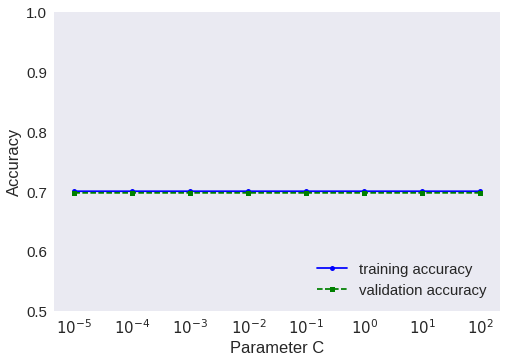

In [18]:
from sklearn.learning_curve import validation_curve
param_range = [1e-5,1e-4,0.001, 0.01, 0.1, 1.0, 10.0, 100.0 ]
train_scores, test_scores = validation_curve(
estimator=ridge,
X=X_train,
y=y_train,
param_name='alpha',
param_range=param_range)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
color='blue', marker='o',
markersize=5,
label='training accuracy')

plt.plot(param_range, test_mean,
color='green', linestyle='--',
marker='s', markersize=5,
label='validation accuracy')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()


In [19]:
ridge.coef_

array([ -30474.49302213,   31427.25277929,   87801.66335008,
          3033.26216308,     719.06492983,   44308.45442167,
         42810.54408845,   13609.8494563 ,  108385.01935554,
         81944.65244896,   27928.70544003,  -76016.36952503,
          7992.85061774,  -27083.74312956,   82029.30458607,
        -27728.48997339,    8757.8140225 ,   -6089.58115266])

In [20]:
from sklearn.preprocessing import PolynomialFeatures

pr = LinearRegression(n_jobs=-1)
quad = PolynomialFeatures(degree = 2)
X_quad = quad.fit_transform(X_train)
pr = pr.fit(X_quad, y_train)
quadratic_r2 = r2_score(y_train, pr.predict(X_quad))
print("r2  of 2: ", quadratic_r2)

r2  of 2:  0.834662176129


In [21]:
train_sizes, train_scores, test_scores =learning_curve(estimator=pr,X=X_quad,y=y_train,train_sizes=np.linspace(0.2, 1.0, 10),cv=10,n_jobs=-1)
#print(train_scores,test_scores)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(train_sizes)
print(test_mean)


[ 2723  3933  5143  6354  7564  8774  9985 11195 12405 13616]
[ 0.72356245  0.78260055  0.78058388  0.78942279  0.80095393  0.80940045
  0.81310238  0.81497455  0.81657637  0.8168767 ]


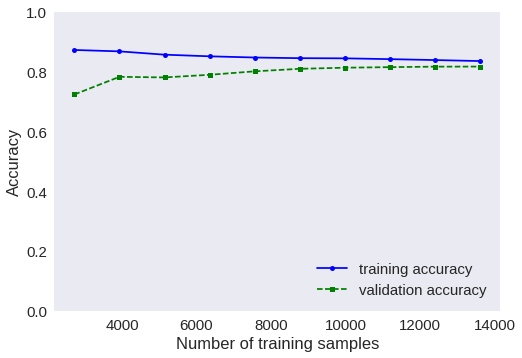

In [22]:
plt.plot(train_sizes, train_mean,
color='blue', marker='o',
markersize=5,
label='training accuracy')

plt.plot(train_sizes, test_mean,
color='green', linestyle='--',
marker='s', markersize=5,
label='validation accuracy')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1.0])
plt.show()

In [23]:
X_test_quad = quad.transform(X_test)
pred=pr.predict(X_test_quad)
#pred=pr.predict(X_test)
print(X_test.shape)
print(y_test.shape)

(6484, 18)
(6484,)


In [24]:

print('r2_2',r2_score(y_test,pred))


r2_2 0.804052663155


Now since polynomial features adds lot of features to the data we select most important features based on feature selection techniques and then try to fit higher degree Polynomial Features and check the r2_score on training and test accuracy

# selecting features through sequential backward selection

In [27]:
class SBS():
    def __init__(self, estimator, k_features,scoring=r2_score,test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train,X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [32]:
lr = LinearRegression(n_jobs=-1)
sbs = SBS(lr, k_features = 5)
sbs.fit(X_train, y_train)

In [46]:
k_feat = [k for k in sbs.subsets_]
k_feat[-1]

(2, 5, 8, 11, 14)

In [53]:
cols1 = cols[1:]
feature_ranks = list(k_feat[-1])
new_features = [cols[i] for i in feature_ranks] 
new_features

['bathrooms', 'floors', 'condition', 'sqft_basement', 'zipcode']